Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


## 1. To a Learning Outcome  Upload the data and display data columns, number of rows, variable types, and numeric statistics + categorical variable frequencies 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
#put your path here.


data_filename1 = 'nyc_data.csv' 
data_filename2 = 'nyc_fare.csv'

In [3]:
data = pd.read_csv(data_filename1, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] )
data2 = pd.read_csv(data_filename2, 
                   parse_dates=['pickup_datetime'])
#pd.read_csv?

FileNotFoundError: File b'nyc_fare.csv' does not exist

head() method of DataFrames displays the first three lines of the table

In [ ]:
#display data columns
data.head()

In [4]:
#number of rows
data.shape
#So the data is 846945rows and 14 columns

(846945, 14)

In [5]:
#variable types
data.dtypes

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object

In [6]:
#numeric statistics
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


In [7]:
# 14 columns,3 Categoriacals, 846945 rows. 
# Categorical variables are 'vendor_id', 'rate_code', and 'store_and_fwd_flag'

In [8]:
#categorical variable frequencies
print(data.groupby(['vendor_id'])['hack_license'].count())
print(data.groupby(['rate_code'])['hack_license'].count())
print(data.groupby(['store_and_fwd_flag'])['hack_license'].count())
print(data.groupby(['store_and_fwd_flag'])['hack_license'].count())

vendor_id
CMT    424678
VTS    422267
Name: hack_license, dtype: int64
rate_code
0       118
1    830025
2     14735
3       121
4       533
5      1398
6        15
Name: hack_license, dtype: int64
store_and_fwd_flag
N    414599
Y      9978
Name: hack_license, dtype: int64
store_and_fwd_flag
N    414599
Y      9978
Name: hack_license, dtype: int64


In [9]:
# Null in store_and_fwd_flag categorical variable
data['store_and_fwd_flag'].isna().sum()

422368

In [10]:
#422368 rows of store_and_fwd_flag are null.

Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

## 2.Display a scatter plot of pick up locations. For which vendor is it easier to find a cab? 

In [11]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [12]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [13]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [14]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same
length.
Documentation: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

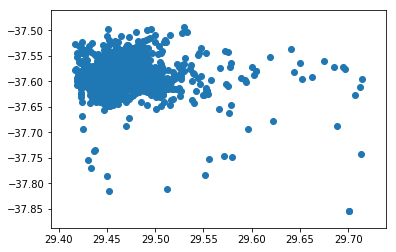

In [15]:
plt.scatter(px, py)

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

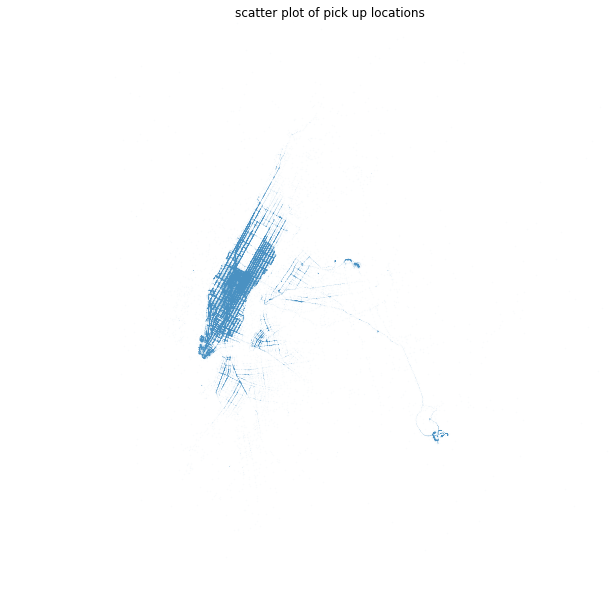

In [16]:
# Specify the figure size
plt.figure(figsize=(10, 10))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=0.1, alpha=0.03)
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')
# set title
plt.title("scatter plot of pick up locations")
plt.show()

# To distinghuish different vendors, we need to plot them in difference colors to see if there is any findings

In [17]:
uniq = list(set(data['vendor_id']))

In [18]:
import matplotlib
#set the color map to match the number of vendor
z = range(1,len(uniq))
cmap = matplotlib.cm.get_cmap('hot')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = matplotlib.cm.ScalarMappable(norm=normalize, cmap=cmap)

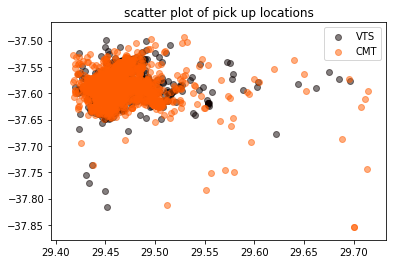

In [19]:
for i in range(len(uniq)):
    indx = data['vendor_id'] == uniq[i]
    plt.scatter(px[indx], py[indx],color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5)
plt.title("scatter plot of pick up locations")
plt.legend(loc='upper right')
plt.show()

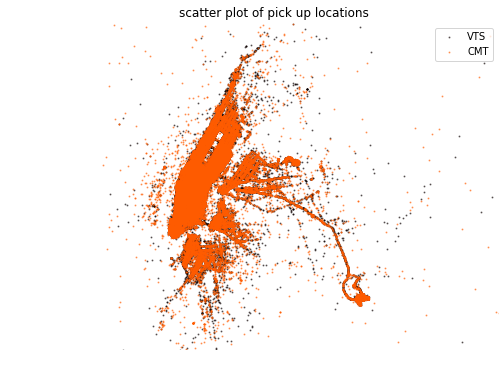

In [20]:
#plot each species vendor
plt.figure(figsize=(8, 6))
for i in range(len(uniq)):
    indx = data['vendor_id'] == uniq[i]
    plt.scatter(px[indx], py[indx],color=scalarMap.to_rgba(i), label=uniq[i],s=1, alpha=0.5)
plt.title("scatter plot of pick up locations")
plt.legend(loc='upper right')
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')
plt.show()

## Display a histogram of the trip distances.
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


In [21]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

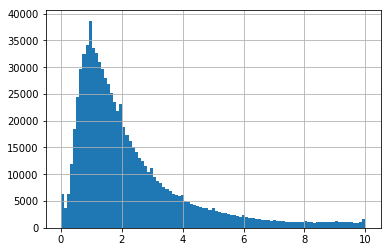

In [22]:
data.trip_distance.hist(bins=bin_array)

In [23]:
trip_distance = data['trip_distance'].value_counts()
trip_distance.head(1)

1.0    21815
Name: trip_distance, dtype: int64

In [24]:
# 21815 is the most common trip distance

In [25]:
# Display a histogram of the fare total amounts
total_amount = data2['total_amount']
bin_array2 = np.linspace(start = min(total_amount), stop = max(total_amount), num = 100)
#plot1 = data2.total_amount.hist(bins = bin_array2)
plt.hist(total_amount, bins = bin_array2)
plt.title('Histogram of the Fare Total Amounts')
plt.xlabel('Total Amount for a Trip')
plt.ylabel('No. of Trips')

NameError: name 'data2' is not defined

In [ ]:
#bin_array3 = np.linspace(start = -50, stop = 150, num = 100)
#data2.total_amount.hist(bins = bin_array3)
#plt.hist(total_amount, bins = bin_array3)
#plt.title('Histogram of the Fare Total Amounts')
#plt.xlabel('Total Amount for a Trip')
#plt.ylabel('No. of Trips')

In [ ]:
# What can you say about the data?
# The distribution of the amount paid is shown above. Compare to the original dataset, there are some outliers that are not easy shown in the graph.
# For instance, there are some trips with payment greater than $200 or been negative (may due to some promos), which are not shown because of the small frequency.
# From the current plot of over 500 thousand trips, we can observe that most trips cost between $0 - 25 and trips with $0 - 75 take up the majority of the orders.

## Filtering with boolean indexing
### Select long rides

data.loc[data.trip_distance > 100]

In [26]:
data.loc[data['trip_distance'] > 100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


In [ ]:
# There are 3 unusually long trips (first 3 records).

In [ ]:
#End